In [24]:
import numpy as np
import pandas as pd
import data_pipeline2 as dp
import seaborn as sns
from test_fncs import recursive_pred
import torch.nn as nn
import torch

import training_models as tm
import ml_models
import matplotlib.pyplot as plt

from test_fncs import recursive_pred

In [8]:
config = {
    'input_size' : 40,
    'lr' : 1e-4,
    'batch_size' : 32,
    'hidden_size' : 8,
    'output_size' : 40,
    'layer_amt' : 3
    }

In [9]:
df_train, df_test_1 = dp.get_cmapss_data(0, 80, data_dir ='data_synthetic', chosen_sensor = 16)


# Load data
dataloader_1, idx = dp.get_loaded_data(df_test_1, win_size=config['input_size'], 
                                     outp_size=config['output_size'], chosen_sensor = 16, batch_size=32, shuffle=False)

In [10]:
df_train, df_test_2 = dp.get_cmapss_data(0, 80, data_dir ='data_synthetic', chosen_sensor = 25)

# Load data
dataloader_2, idx = dp.get_loaded_data(df_test_2, win_size=config['input_size'], 
                                     outp_size=config['output_size'], chosen_sensor = 25, batch_size=32, shuffle=False)


In [11]:
df_train, df_test_3 = dp.get_cmapss_data(0, 80, data_dir ='data_synthetic', chosen_sensor = 24)

# Load data
dataloader_3, idx = dp.get_loaded_data(df_test_3, win_size=config['input_size'], 
                                     outp_size=config['output_size'], chosen_sensor = 24, batch_size=32, shuffle=False)

Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_14028\1370491551.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/mlp/output_size{40}input_siz

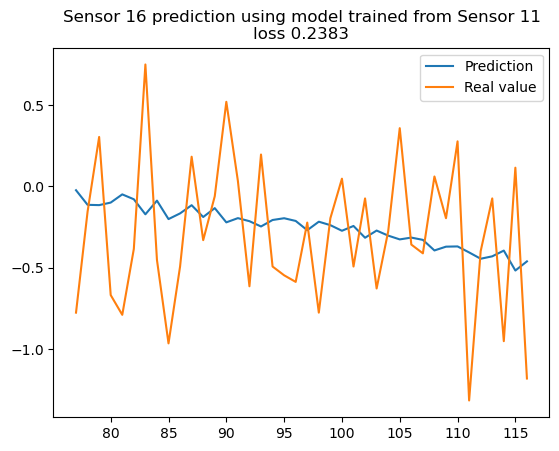

,model,input_size,output_size,loss,predictions
0,MLP,40,40,0.238263,"[[1.205216646194458, 1.18295156955719, 1.16429..."


In [40]:
loss = nn.MSELoss()

results = []



# Load model
state_dict = torch.load(f'models/mlp/output_size{40}input_size{40}.pt')
mod = tm.train_model(config, it_amt=0, model_fnc=ml_models.MLP, data_dir='data_synthetic')
mod.load_state_dict(state_dict)
mod.eval()


preds, xs, ys, txs, tys, sensors = [], [], [], [], [], []
tot_loss = 0.0

i=0

# Loop through batches
for data in dataloader_1:
    x, y, tx, ty, sensor = data
    pred = mod(x)
    
    loss_val = loss(pred, y).item()

    preds.append(pred)

    tot_loss += loss_val
    
    if i == 60:
        plt.plot(ty[0],pred[0].detach().numpy(), label = 'Prediction')
        plt.plot(ty[0],y[0], label = 'Real value')
        plt.legend()
        
    i+=1
    


plt.title('Sensor 16 prediction using model trained from Sensor 11\nloss '+str(np.round(tot_loss/len(dataloader_1),4)))
plt.show()


# Convert to tensor
preds_tensor = torch.cat(preds).detach().numpy()

# Save results
results.append({
    'model' : 'MLP',
    'input_size': 40,
    'output_size': 40,
    'loss': tot_loss/len(dataloader_1),
    'predictions': preds_tensor.tolist(),  # Save as list if needed
})


# Create DataFrame
df_results1 = pd.DataFrame(results)
df_results1

Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_14028\3493629037.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/mlp/output_size{40}input_siz

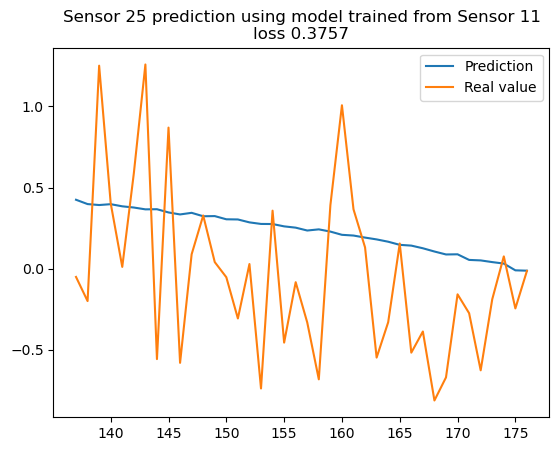

,model,input_size,output_size,loss,predictions
0,MLP_recursive,40,40,0.375674,"[[1.1585273742675781, 1.1251822710037231, 1.12..."


In [37]:
loss = nn.MSELoss()

results = []



# Load model
state_dict = torch.load(f'models/mlp/output_size{40}input_size{40}.pt')
mod = tm.train_model(config, it_amt=0, model_fnc=ml_models.MLP, data_dir='data_synthetic')
mod.load_state_dict(state_dict)
mod.eval()


preds, xs, ys, txs, tys, sensors = [], [], [], [], [], []
tot_loss = 0.0

i=0
# Loop through batches
for data in dataloader_2:
    x, y, tx, ty, sensor = data
    pred = mod(x)
    
    loss_val = loss(pred, y).item()

    preds.append(pred)

    tot_loss += loss_val
    
    if i == 30:
        plt.plot(ty[0],pred[0].detach().numpy(), label = 'Prediction')
        plt.plot(ty[0],y[0], label = 'Real value')
        plt.legend()

        
    i+=1

plt.title('Sensor 25 prediction using model trained from Sensor 11\nloss '+str(np.round(tot_loss/len(dataloader_2),4)))
plt.show()

    
# Convert to tensor
preds_tensor = torch.cat(preds).detach().numpy()

# Save results
results.append({
    'model' : 'MLP_recursive',
    'input_size': 40,
    'output_size': 40,
    'loss': tot_loss/len(dataloader_2),
    'predictions': preds_tensor.tolist(),  # Save as list if needed
})


# Create DataFrame
df_results2 = pd.DataFrame(results)
df_results2

C:\Users\livb\AppData\Local\Temp\ipykernel_14028\270248462.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/mlp/output_size{40}input_size

Finished Training


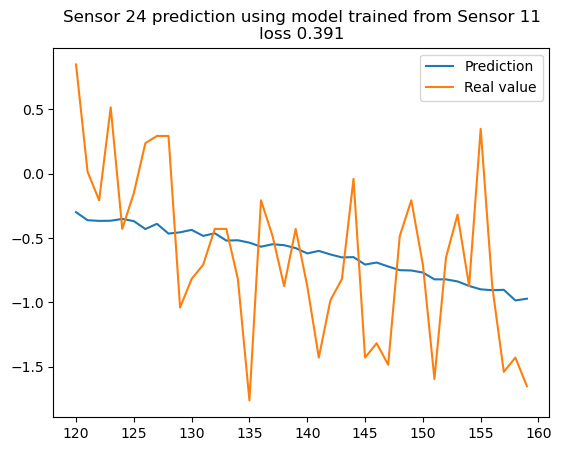

,model,input_size,output_size,loss,predictions
0,MLP_recursive,40,40,0.390952,"[[1.1280016899108887, 1.0875521898269653, 1.09..."


In [36]:
loss = nn.MSELoss()

results = []



# Load model
state_dict = torch.load(f'models/mlp/output_size{40}input_size{40}.pt')
mod = tm.train_model(config, it_amt=0, model_fnc=ml_models.MLP, data_dir='data_synthetic')
mod.load_state_dict(state_dict)
mod.eval()


preds, xs, ys, txs, tys, sensors = [], [], [], [], [], []
tot_loss = 0.0

i=0
# Loop through batches
for data in dataloader_3:
    x, y, tx, ty, sensor = data
    pred = mod(x)
    
    loss_val = loss(pred, y).item()

    preds.append(pred)

    tot_loss += loss_val
    
    if i == 20:
        plt.plot(ty[0],pred[0].detach().numpy(), label = 'Prediction')
        plt.plot(ty[0],y[0], label = 'Real value')
        plt.legend()
        
    i+=1
    

# Convert to tensor
preds_tensor = torch.cat(preds).detach().numpy()

# Save results
results.append({
    'model' : 'MLP_recursive',
    'input_size': 40,
    'output_size': 40,
    'loss': tot_loss/len(dataloader_3),
    'predictions': preds_tensor.tolist(),  # Save as list if needed
})

plt.title('Sensor 24 prediction using model trained from Sensor 11\nloss '+str(np.round(tot_loss/len(dataloader_3),4)))
plt.show()


# Create DataFrame
df_results3 = pd.DataFrame(results)
df_results3